## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings

## Read the Data

https://drive.google.com/file/d/1a4QhZiSFDLmFCDKOeS-2U9p6IEKLB6y6/view?usp=sharing

In [ ]:
# download file from google drive
! gdown 1a4QhZiSFDLmFCDKOeS-2U9p6IEKLB6y6

In [ ]:
# read csv file
digits = pd.read_csv("/content/digits.csv")
digits.head(3)

,a,b,c,d,e,f,g,digit
0,0,1,1,0,0,1,1,four
1,0,0,1,1,0,1,1,five
2,1,1,1,0,1,1,1,eight


The [seven-segment display][1] is a very common display device for digits. It is made of seven "segments", marked by the letters 'a' to 'g', which in different lighting combinations represent all 10 digits.

[1]: https://en.wikipedia.org/wiki/Seven-segment_display "Seven-segment display - Wikipedia"

In [ ]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       254 non-null    int64 
 1   b       254 non-null    int64 
 2   c       254 non-null    int64 
 3   d       254 non-null    int64 
 4   e       254 non-null    int64 
 5   f       254 non-null    int64 
 6   g       254 non-null    int64 
 7   digit   254 non-null    object
dtypes: int64(7), object(1)
memory usage: 16.0+ KB


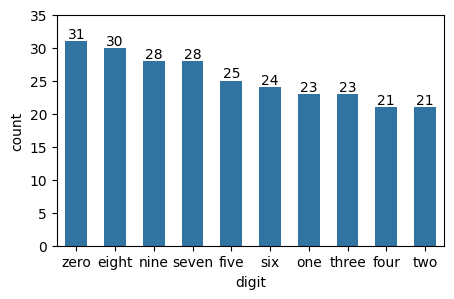

In [ ]:
rcParams['figure.figsize'] = 5, 3

# distribution of target values
ax = sns.barplot(digits.digit.value_counts(),  gap=0.3,)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 35);

## Define and fit the model

In [ ]:
X = digits.drop('digit', axis=1)
y = digits[['digit']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((177, 7), (77, 7), (177, 1), (77, 1))

In [ ]:
dt_cls = DecisionTreeClassifier(min_samples_leaf=3)

Apply the _fit()_ method.

In [ ]:
dt_cls.fit(X_train, y_train)

In [ ]:
# the classes are listed alphabetically
print(dt_cls.classes_)

['eight' 'five' 'four' 'nine' 'one' 'seven' 'six' 'three' 'two' 'zero']


Apply the classification model to the training data.

In [ ]:
y_pred = dt_cls.predict(X_test)

In [ ]:
acc = accuracy_score(y_true=y_test,
                     y_pred=y_pred)
print(f"Accuracy :{acc:.3f}")

Accuracy :0.935


## Confusion Matrix

In [ ]:
# Convert the confusion matrix to a DataFrame
df_cm = pd.DataFrame(
            confusion_matrix(y_true=y_test,
                             y_pred=y_pred),
            index=dt_cls.classes_,
            columns=dt_cls.classes_)

df_cm

,eight,five,four,nine,one,seven,six,three,two,zero
eight,7,0,0,1,0,0,0,0,0,1
five,0,8,0,0,0,0,0,0,0,0
four,0,0,6,0,0,0,0,0,0,0
nine,0,0,0,9,0,0,0,0,0,0
one,0,0,0,0,7,0,0,0,0,0
seven,0,0,0,0,0,9,0,0,0,0
six,0,1,0,0,0,0,6,0,0,0
three,0,0,0,1,0,0,0,6,0,0
two,0,0,0,0,0,0,0,1,5,0
zero,0,0,0,0,0,0,0,0,0,9


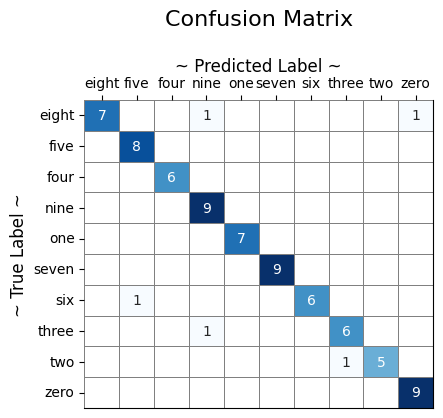

In [ ]:
# @title Create plot_confusion_matrix
def plot_confusion_matrix(df_cm, figsize=(4.5, 4), cmap='Blues', square=False):
    """
    Plots a heatmap for the given confusion matrix.
    Args:
        df_cm (pd.DataFrame): The confusion matrix.
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        df_cm,
        annot=True,                   # displays the actual values in each cell
        annot_kws={"fontsize": 10},   # set the font size for the annotations
        mask=(df_cm == 0),            # applies the mask to hide zero values
        cbar=False,                   # disables the color bar
        square=square,                # ensures the cells are square
        cmap=cmap ,                   # specifies the color map
        linewidths=0.5,               # customize the grid lines
        linecolor='grey')

    # set properties for axes
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.spines[['right', 'bottom']].set_visible(True)
    plt.title('Confusion Matrix\n', fontsize=16)
    plt.xlabel('~ Predicted Label ~', fontsize=12)
    plt.ylabel('~ True Label ~', fontsize=12)

# Example usage:
plot_confusion_matrix(df_cm)

## Classification Report

In [ ]:
# # Convert the classification_report to a DataFrame
df_clf_rep = pd.DataFrame(
    classification_report(
        y_true=y_test,
        y_pred=y_pred,
        zero_division = 0,
        labels=dt_cls.classes_,
        output_dict=True)
    ).T.iloc[:-3, :]
df_clf_rep

,precision,recall,f1-score,support
eight,1.000000,0.777778,0.875000,9.0
five,0.888889,1.000000,0.941176,8.0
four,1.000000,1.000000,1.000000,6.0
nine,0.818182,1.000000,0.900000,9.0
one,1.000000,1.000000,1.000000,7.0
seven,1.000000,1.000000,1.000000,9.0
six,1.000000,0.857143,0.923077,7.0
three,0.857143,0.857143,0.857143,7.0
two,1.000000,0.833333,0.909091,6.0
zero,0.900000,1.000000,0.947368,9.0


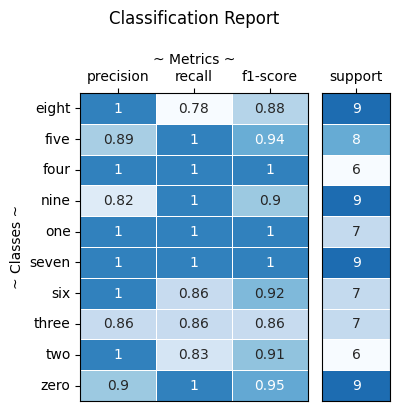

In [ ]:
# @title Create plot_classification_report
params_hm = {'cmap':'Blues', 'cbar':False, 'annot':True, "fmt":'.2g',
            'linewidths':0.5, 'linecolor':'white'}

def plot_classification_report(df_clf_rep, params_hm,
                               figsize=(4, 4)):
    # define a figure and axes
    fig, axs = plt.subplots(ncols=2, figsize=figsize, sharey=True,
                            width_ratios=[1, 0.3])

    # calculate max value for colorscale
    vmax = df_clf_rep.values.max()*1.1

    # create heatmap for classification report
    sns.heatmap(df_clf_rep.iloc[:, :-1],
                vmax=1.1, **params_hm, ax=axs[0])
    axs[0].set(ylabel='~ Classes ~', xlabel='~ Metrics ~',
               title='Classification Report\n')

    # create heatmap for total items in each class (support)
    sns.heatmap(df_clf_rep.iloc[:, -1:],
                vmax=vmax, **params_hm, ax=axs[1])
    axs[1].tick_params(left=False)

    #set properties for axes
    for ax in axs:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.spines[['right', 'left', 'top', 'bottom']].set_visible(True)

    plt.subplots_adjust(wspace=0.1)

# Example usage:
plot_classification_report(df_clf_rep, params_hm)

In [ ]:
# @title Create confusion_matrix_classification_report_plot
def confusion_matrix_classification_report_plot (df_cm, df_clf_rep, params_hm,
                                                 sharey=True, figsize=(8, 4)):
    # define a figure and axes
    fig, axs = plt.subplots(ncols=3, figsize=figsize, sharey=sharey,
                            width_ratios=[1.2, 0.6, 0.2])

    # calculate min and max values for colorscale
    vmin = df_clf_rep.values.min()
    vmax = df_clf_rep.values.max()*1.1

    # create heatmap for confusion matrix
    sns.heatmap(df_cm, mask=(df_cm == 0), **params_hm,
                vmax=vmax, ax=axs[0])
    axs[0].set(ylabel='~ True Label ~',
               xlabel='~ Predicted Label ~',
               title='Confusion Matrix\n')

    # create heatmap for classification report
    sns.heatmap(df_clf_rep.iloc[:, :-1],
                vmin=vmin, vmax=1.1,
                **params_hm, ax=axs[1])
    axs[1].set(ylabel='~ Classes ~',
               xlabel='~ Metrics ~',
               title='Classification Report\n')

    # create heatmap for total items in each class
    sns.heatmap(df_clf_rep.iloc[:, -1:], vmax=vmax,
                **params_hm, ax=axs[2])

    # set properties for axes
    for ax in axs:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.spines[['right', 'left', 'top', 'bottom']].set_visible(True)

    if sharey:
      plt.subplots_adjust(wspace=0.1)
      axs[1].set(ylabel='')
      axs[1].tick_params(left=False)
      axs[2].tick_params(left=False)
    else:
      plt.subplots_adjust(wspace=0.4)

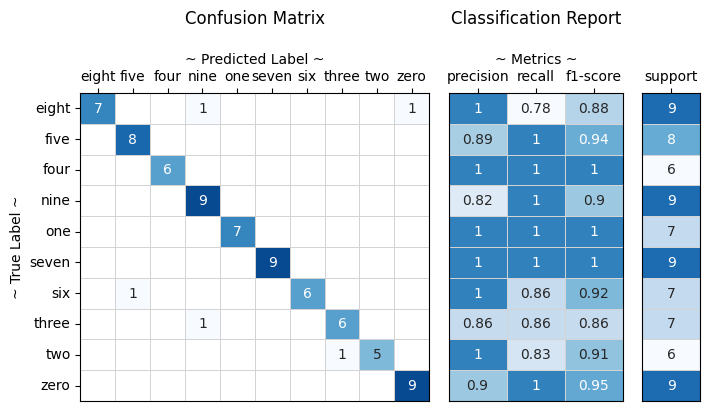

In [ ]:
# Example usage:
params_hm['linecolor'] = 'lightgrey'

confusion_matrix_classification_report_plot(df_cm, df_clf_rep, params_hm)

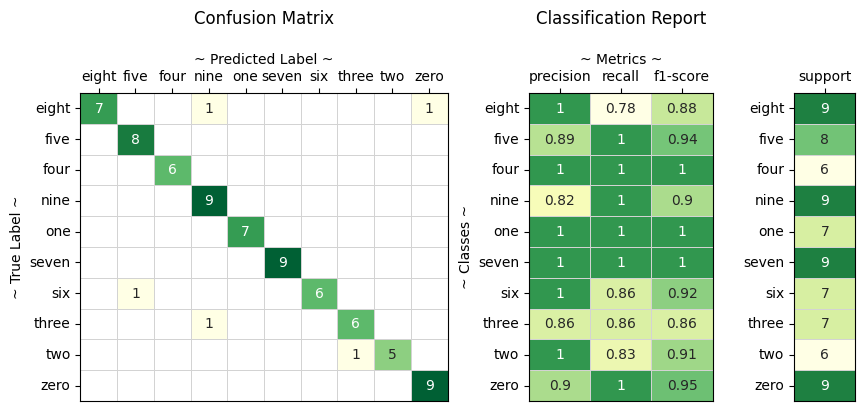

In [ ]:
# Example with sharey=False and cmap='YlGn':
params_hm['cmap']='YlGn'

confusion_matrix_classification_report_plot(df_cm, df_clf_rep, params_hm,
                                            sharey=False, figsize=(10, 4))